# 머신러닝 : 지도학습
1. 데이터 수집
2. EDA
3. 학습데이터 생성 : 학습 데이터와 테스트 데이터 분리

In [1]:
# 데이터 전처리 : 결측치 처리

import pandas as pd

# 데이터 예시
data = {
'CustomerID': [1, 2, 3, 4, 5],
'Age': [25, 30, None, 35, 28],
'Gender': ['Male', 'Female', 'Female', 'Male', None],
'Satisfaction': [5, 4, 3, None, 2],
'PurchaseAmount': [100, 200, None, 150, 0]
}
df = pd.DataFrame(data)

# 결측치 처리

# 나이는 평균으로 대체
df['Age'] = df['Age'].fillna(df['Age'].mean())

# 구매액은 0으로 대체
df['PurchaseAmount'] = df['PurchaseAmount'].fillna(0)

# 만족도 평균으로 대체
df['Satisfaction'] = df['Satisfaction'].fillna(df['Satisfaction'].mean())

print(df)


   CustomerID   Age  Gender  Satisfaction  PurchaseAmount
0           1  25.0    Male           5.0           100.0
1           2  30.0  Female           4.0           200.0
2           3  29.5  Female           3.0             0.0
3           4  35.0    Male           3.5           150.0
4           5  28.0    None           2.0             0.0


In [9]:
print(df.describe())

       CustomerID        Age  Satisfaction  PurchaseAmount
count    5.000000   5.000000      5.000000        5.000000
mean     3.000000  29.500000      3.500000       90.000000
std      1.581139   3.640055      1.118034       89.442719
min      1.000000  25.000000      2.000000        0.000000
25%      2.000000  28.000000      3.000000        0.000000
50%      3.000000  29.500000      3.500000      100.000000
75%      4.000000  30.000000      4.000000      150.000000
max      5.000000  35.000000      5.000000      200.000000


In [3]:
import matplotlib.pyplot as plt

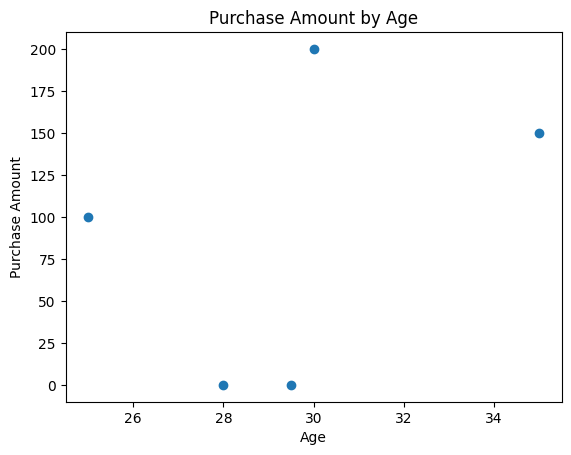

In [5]:
plt.scatter(df['Age'], df['PurchaseAmount'])
plt.title('Purchase Amount by Age')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.show()


In [7]:
# 성별에 따른 만족도 시각화
gender_satisfaction = df.groupby('Gender')['Satisfaction'].mean()
print(gender_satisfaction)

Gender
Female    3.50
Male      4.25
Name: Satisfaction, dtype: float64


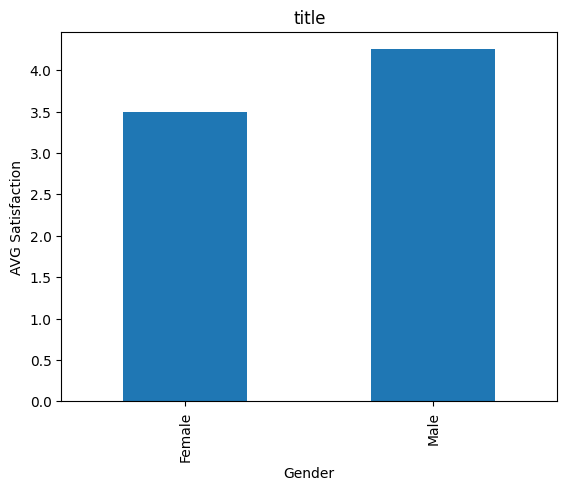

In [8]:
gender_satisfaction.plot(kind='bar')
plt.title('title')
plt.xlabel('Gender')
plt.ylabel('AVG Satisfaction')
plt.show()

In [10]:
# Gender는 숫자로 변환 (Label Encoding)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
# 특성과 타겟 분리
X = df[['Age', 'Gender', 'PurchaseAmount']] # 입력 데이터
y = df['Satisfaction'] # 출력 데이터
print(X)
print(y)

    Age  Gender  PurchaseAmount
0  25.0     0.0           100.0
1  30.0     1.0           200.0
2  29.5     1.0             0.0
3  35.0     0.0           150.0
4  28.0     NaN             0.0
0    5.0
1    4.0
2    3.0
3    3.5
4    2.0
Name: Satisfaction, dtype: float64


In [11]:
from sklearn.model_selection import train_test_split

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)
print("학습 데이터 크기:", X_train.shape)
print("테스트 데이터 크기:", X_test.shape)
print(X_train) # 학습 데이터의 입력 데이터
print('*'*10)
print(y_train) # 학습 데이터의 출력 데이터
print('*'*10)
print(X_test) # 테스트 데이터의 입력 데이터
print('*'*10)
print(y_test) # 테스트 데이터의 출력 데이터

학습 데이터 크기: (4, 3)
테스트 데이터 크기: (1, 3)
    Age  Gender  PurchaseAmount
4  28.0     NaN             0.0
2  29.5     1.0             0.0
0  25.0     0.0           100.0
3  35.0     0.0           150.0
**********
4    2.0
2    3.0
0    5.0
3    3.5
Name: Satisfaction, dtype: float64
**********
    Age  Gender  PurchaseAmount
1  30.0     1.0           200.0
**********
1    4.0
Name: Satisfaction, dtype: float64


In [1]:
# 선형 회귀 예시
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 준비
# 입력 데이터 (공부 시간)
X = np.array([1, 2, 3, 4, 5])
# 출력 데이터 (시험 점수)
y = np.array([50, 55, 65, 70, 75])

In [2]:
# 2. 초기 값 설정
m = 0 # 초기 기울기
b = 0 # 초기 y절편
learning_rate = 0.01 # 학습 속도
epochs = 1000 # 학습 반복 횟수

# 경사하강법을 이용한 학습
for _ in range(epochs):
# 예측 값 계산
    y_pred = m * X + b

# 손실 함수(MSE) 계산
    error = y - y_pred
    mse = (error ** 2).mean()

# 기울기(m)와 y절편(b)의 변화량 계산
    m_gradient = -(2 / len(X)) * sum(X * error)
    b_gradient = -(2 / len(X)) * sum(error)
    
# 기울기와 절편 업데이트
    m -= learning_rate * m_gradient
    b -= learning_rate * b_gradient

학습된 기울기(m): 6.86
학습된 y절편(b): 42.19


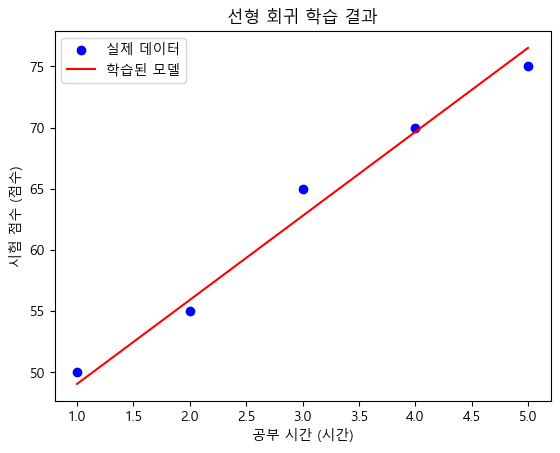

새로운 공부 시간에 따른 예측 점수: [ 83.36696784  97.09256028 110.81815271]


In [5]:
# 학습 결과 출력
print(f"학습된 기울기(m): {m:.2f}")
print(f"학습된 y절편(b): {b:.2f}")

# 4. 학습 결과 시각화
y_pred = m * X + b # 학습된 모델의 예측 값

plt.rc('font', family='Malgun Gothic') # For Windows

plt.scatter(X, y, color='blue', label='실제 데이터') # 실제 데이터
plt.plot(X, y_pred, color='red', label='학습된 모델') # 학습된 직선
plt.xlabel('공부 시간 (시간)')
plt.ylabel('시험 점수 (점수)')
plt.legend()
plt.title('선형 회귀 학습 결과')
plt.show()

# 5. 새로운 데이터 예측
new_study_hours = np.array([6, 8, 10]) # 새로운 공부 시간
predicted_scores = m * new_study_hours + b
print("새로운 공부 시간에 따른 예측 점수:", predicted_scores)

In [5]:
from matplotlib import font_manager

f_path = 'C:\Windows\Fonts\malgun.ttf'
font_manager.FontProperties(fname=f_path).get_name()

<>:3: SyntaxWarning: invalid escape sequence '\W'
<>:3: SyntaxWarning: invalid escape sequence '\W'
C:\Users\user\AppData\Local\Temp\ipykernel_16572\3760945861.py:3: SyntaxWarning: invalid escape sequence '\W'
  f_path = 'C:\Windows\Fonts\malgun.ttf'


'Malgun Gothic'

학습된 기울기(m): 6.50
학습된 y절편(b): 43.50
MSE: 1.50
RMSE: 1.22
MAE: 1.00
R^2: 0.98


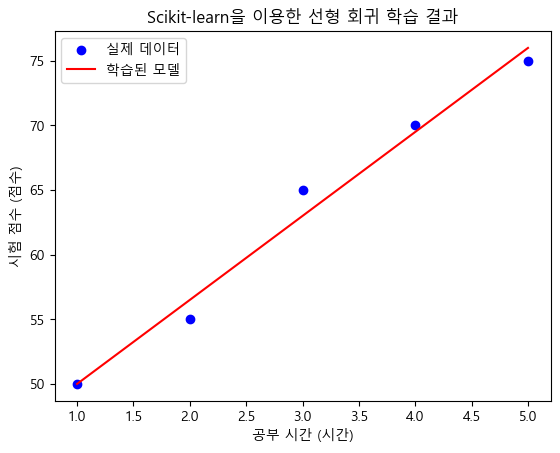

새로운 공부 시간에 따른 예측 점수: [ 82.5  95.5 108.5]


In [7]:
# scikit-learn을 사용한 선형 회귀 학습

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. 데이터 준비
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1) # 공부 시간 (2D 배열로 변환)
y = np.array([50, 55, 65, 70, 75]) # 시험 점수

# 2. 모델 학습
model = LinearRegression() # 선형 회귀 모델 생성
model.fit(X, y) # 모델 학습

# 3. 학습된 모델의 기울기와 절편 확인
m = model.coef_[0] # 기울기
b = model.intercept_ # 절편
print(f"학습된 기울기(m): {m:.2f}")
print(f"학습된 y절편(b): {b:.2f}")

# 4. 예측 값 계산
y_pred = model.predict(X) # 학습 데이터에 대한 예측 값

# 5. 성능 평가
mse = mean_squared_error(y, y_pred) # MSE 계산
rmse = np.sqrt(mse) # RMSE 계산
mae = mean_absolute_error(y, y_pred) # MAE 계산
r2 = r2_score(y, y_pred) # R^2 계산
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R^2: {r2:.2f}")

# 6. 학습 결과 시각화
plt.rc('font', family='Malgun Gothic') # For Windows
plt.scatter(X, y, color='blue', label='실제 데이터') # 실제 데이터
plt.plot(X, y_pred, color='red', label='학습된 모델') # 학습된 직선
plt.xlabel('공부 시간 (시간)')
plt.ylabel('시험 점수 (점수)')
plt.legend()
plt.title('Scikit-learn을 이용한 선형 회귀 학습 결과')
plt.show()

# 7. 새로운 데이터 예측
new_study_hours = np.array([6, 8, 10]).reshape(-1, 1) # 새로운 공부 시간
predicted_scores = model.predict(new_study_hours) # 예측
print("새로운 공부 시간에 따른 예측 점수:", predicted_scores)

# 사이킷런을 이용한 분류 성능 평가 예제

In [8]:
# 필요한 라이브러리 불러오기
from sklearn.datasets import load_breast_cancer # 유방암 데이터셋 로드
from sklearn.model_selection import train_test_split # 학습용/테스트용 데이터 분리
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report # 평가 지표

In [9]:
# 1. 데이터셋 로드 및 분리
data = load_breast_cancer() # 유방암 데이터셋 로드
X = data.data # 특징 데이터 (환자의 다양한 세포 정보)
y = data.target # 레이블 데이터 (0: 음성, 1: 양성)

In [10]:
# 학습용 데이터와 테스트용 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)
# test_size=0.2: 데이터의 20%는 테스트용으로 사용
# random_state=42: 실행할 때마다 동일한 데이터 분리 결과를 얻기 위해 설정

In [11]:
# 2. 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=10000) # 로지스틱 회귀 모델 생성 (최대반복 횟수 설정)
model.fit(X_train, y_train) # 학습 데이터로 모델 훈련

LogisticRegression(max_iter=10000)

In [12]:
# 3. 테스트 데이터 예측
y_pred = model.predict(X_test) # 테스트 데이터를 사용하여 결과 예측

In [13]:
# 4. 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred) # 정확도 계산
precision = precision_score(y_test, y_pred) # 정밀도 계산
recall = recall_score(y_test, y_pred) # 재현율 계산
f1 = f1_score(y_test, y_pred) # F1-Score 계산

In [14]:
# 5. 결과 출력
print("정확도(Accuracy):", accuracy) # 정확도 출력
print("정밀도(Precision):", precision) # 정밀도 출력
print("재현율(Recall):", recall) # 재현율 출력
print("F1-Score:", f1) # F1-Score 출력

정확도(Accuracy): 0.956140350877193
정밀도(Precision): 0.9459459459459459
재현율(Recall): 0.9859154929577465
F1-Score: 0.9655172413793104


In [15]:
# 혼동 행렬 출력
print("\n혼동 행렬 (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
# 혼동 행렬을 통해 TP, TN, FP, FN 값 확인



혼동 행렬 (Confusion Matrix):
 [[39  4]
 [ 1 70]]


In [16]:
# 분류 보고서 출력
print("\n분류 보고서 (Classification Report):\n",
classification_report(y_test, y_pred))
# Classification Report로 각 클래스에 대한 평가 지표 확인


분류 보고서 (Classification Report):
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

